<a href="https://colab.research.google.com/github/vinceriot/computervision/blob/main/CV_mnist_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Голдобин Денис ФИТ-2. Датасет - Fashion

# Соберем сверточную нейронную сеть LiNet5

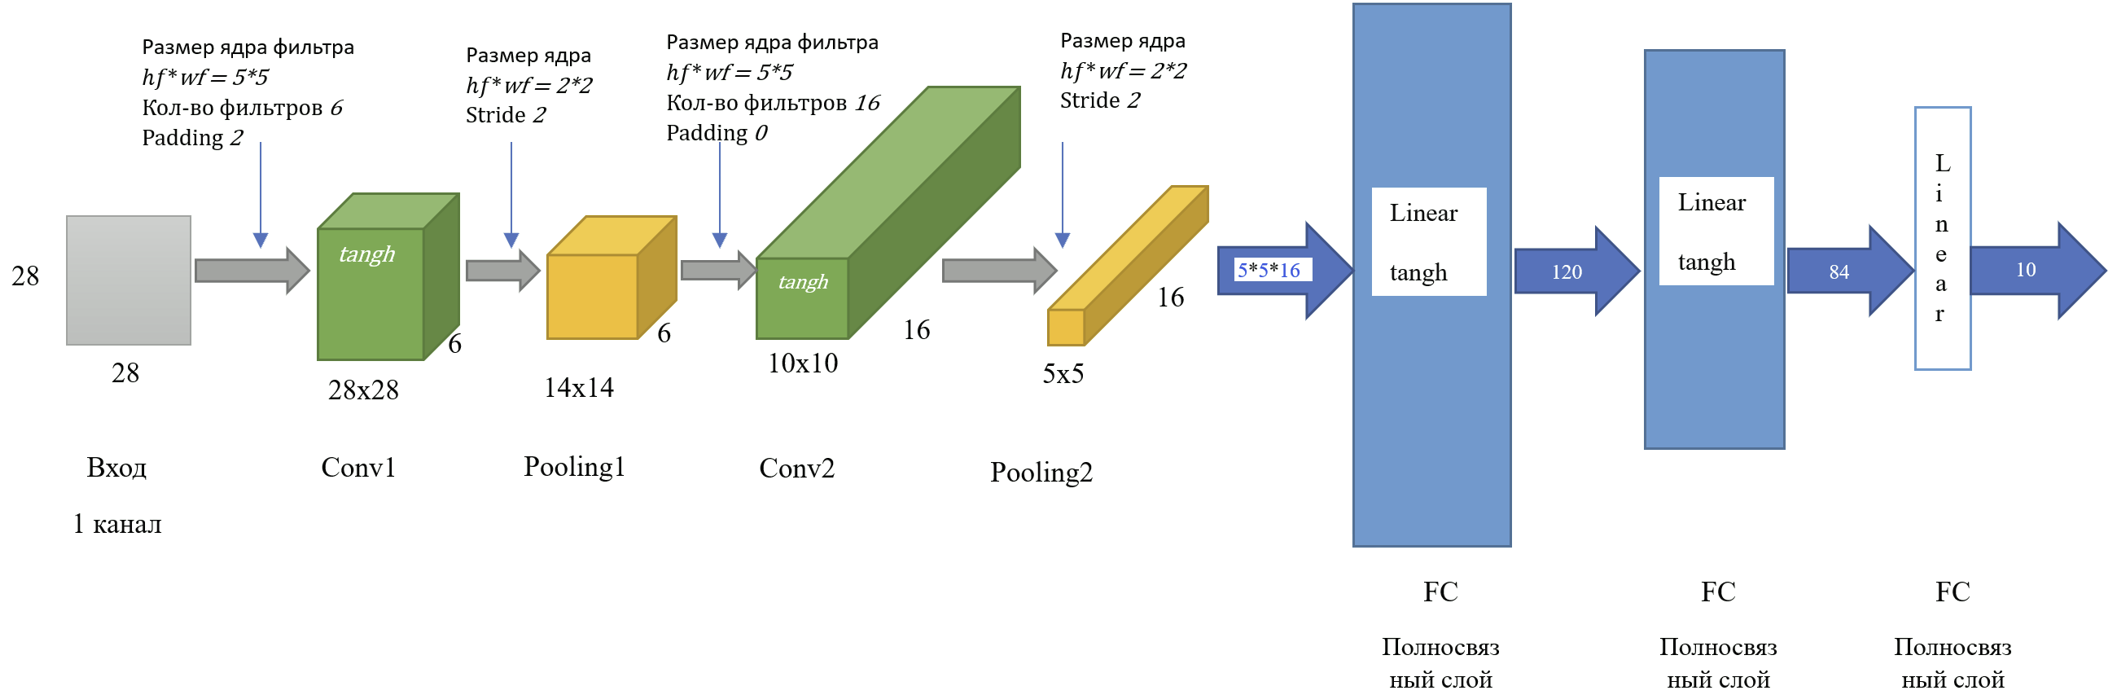


В архитектуре нейронной сети, показанной выше:

**Слой Conv1** представляет собой сверточный слой с шестью картами признаков, размер которых составляет 28 × 28, функция активации tangh;
**Слой Pooling1** – это слой подвыборки (polling) с шестью картами признаков, размер которых составляет 14 × 14, функция активации AvgPooling;
**Слой Conv2** представляет собой сверточный слой с шестнадцатью характеристическими картами (слоями), размер которых составляет 10 × 10, функция активации tangh;
**Слой Pooling2** является слоем подвыборки с шестнадцатью характеристическими картами, размер которых составляет 5 × 5, функция активации AvgPooling;
**Слой FC** представляет собой полносвязанный слой, вход 5*5*16 нейронов (признаков), выход 120 нейронов, функция активации tangh;
**Слой FC** представляет собой полносвязанный слой, вход 120 нейронов (признаков), выход 84 нейронов, функция активации tangh;
**Слой FC** представляет собой полносвязанный слой, вход 84 нейронов (признаков), выход 10 нейронов;



In [ ]:
# импортируем библиотеки

import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
# это для cuda .
#torch.cuda.memory_summary(device=None, abbreviated=True)

In [ ]:
# это для cuda. принудительно освобождение памяти, что иногда, но очень редко, помогает решить проблему с отказом
# cuda использовать память
#import gc
#gc.collect()

#torch.cuda.empty_cache()

In [ ]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [ ]:
# будем использовать встроенные датасеты торча.
# полный список - тут https://pytorch.org/vision/stable/datasets.html


import torchvision.datasets

In [ ]:
# загружаем сразу в трайн и тест
MNIST_train = torchvision.datasets.FashionMNIST ('./', download=True, train=True)
MNIST_test = torchvision.datasets.FashionMNIST ('./', download=True, train=False)


In [ ]:
# формируем датасеты для обучения, тестирования, целевые переменные
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


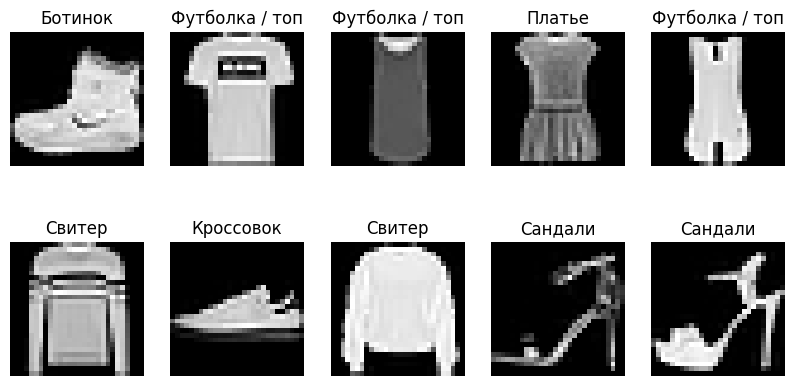

In [ ]:
# Функция для отображения изображений
def show_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

# Пример вывода 10 изображений с названиями
show_images(X_train, y_train, class_names)

In [ ]:
# сколько изображений в трейне и тесте
len(y_train), len(y_test)

(60000, 10000)

image:
tensor([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,   0,
           0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187, 149,
         135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221, 197,
         146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187, 190,
         188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168, 173,
         174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,   0,   0],
        [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180, 184,
         178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,   0,   0],
        [  0,   0,   0,   0,  35, 177, 

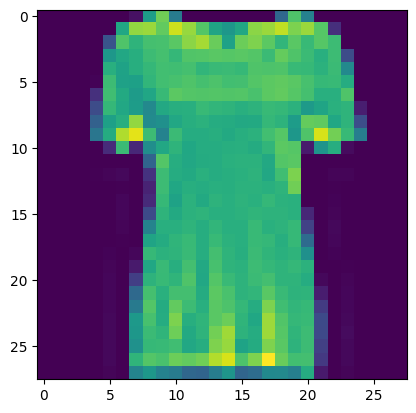

tensor(0)


In [ ]:
# нарисуем, c чем мы имеем дело
import matplotlib.pyplot as plt

im_number = 10

# вот как хранятся изображения в компьютере
print(f"image:\n{X_train[im_number, :, :]}")

# а так их видим мы
plt.imshow(X_train[im_number, :, :])

plt.show()
print(y_train[im_number])

In [ ]:
# посмотртим тип "картинок"
type(X_train[10, :, :])

torch.Tensor

In [ ]:
X_train.shape

torch.Size([60000, 28, 28])

In [ ]:
# unsqueeze - Возвращает новый тензор с увеличенной на 1 размерностью, которая вставляется в указанную позицию.
# было torch.Size([60000, 28, 28])  ---- станет torch.Size([60000, 1, 28, 28])
# и все значения - во float

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [ ]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [ ]:
X_test.shape

torch.Size([10000, 1, 28, 28])

In [ ]:
# Определяем класс, которые и будет представлять нашу нейронку
# какие слои - см описание вначале блокнота

class LeNet5(torch.nn.Module):
    # конструктор. Определям вообще какие слои у нас будут
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(84, 10)

    # наша самая главная функция. Определяем, что и в каком порядке будет вызываться
    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

# переменная - наша нейронка
lenet5 = LeNet5()

In [ ]:
# определяем, где будет обучаться наша СNN
# если есть граф процессор от Nvidia, то на нем. Если нет, то на cpu

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = "cpu"

# отправляем туда нашу нейронку
lenet5 = lenet5.to(device)

# ЕСЛИ ВЫ ОБУЧИТЕ НЕЙРОНКУ НА GPU или CPU ОНА ДЛЯ СВОЕЙ РАБОТЫ БУДЕТ ТРЕБОВАТЬ ИЛИ GPU, ИЛИ CPU
Поэтому не всегда возможно использование обучения на GPU просто потому, что сервер или компьютер пользователя не будет поддерживать расчеты на GPU

In [ ]:
# в качестве функции потерь будем использовать CrossEntropyLoss()
loss = torch.nn.CrossEntropyLoss()

# в качестве оптимайзера, который будет вычислять градиенты и минимизировать функцию потерь, будем использовать Adam (Адаптивная оценка момента)
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [ ]:
# будем оптимизировать по 100 параметров одним комплектом (бачем)
batch_size = 100

# чтобы посмотреть, как и что у нас тут менялось при оптимизации на тестовой выборке
test_accuracy_history = []
test_loss_history = []


train_loss_history = []

# не забываем отправить все выборки на устройство, на котором обучаем
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        # обязательно обнуляем градиенты
        optimizer.zero_grad()

        # берем пачку параметров
        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        # делаем предсказание
        preds = lenet5.forward(X_batch)

        # считаем лосс значение
        loss_value = loss(preds, y_batch)

        # берем градиенты
        loss_value.backward()

        # и пусть оптимайзер все оптимизирует
        optimizer.step()

    # смотрим, что он тут нам напредсказывал, не забывая вовремя отправлять на cpu
    train_loss_history.append(loss_value.data.cpu())

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())


    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(f"epoch{epoch} - accuracy test {accuracy} ")

epoch0 - accuracy test 0.8501999974250793 
epoch1 - accuracy test 0.8667999505996704 
epoch2 - accuracy test 0.8743999600410461 
epoch3 - accuracy test 0.8629999756813049 
epoch4 - accuracy test 0.8854999542236328 
epoch5 - accuracy test 0.8892999887466431 
epoch6 - accuracy test 0.8932999968528748 
epoch7 - accuracy test 0.8944000005722046 
epoch8 - accuracy test 0.8912000060081482 
epoch9 - accuracy test 0.9003999829292297 
epoch10 - accuracy test 0.894599974155426 
epoch11 - accuracy test 0.8985999822616577 
epoch12 - accuracy test 0.9050999879837036 
epoch13 - accuracy test 0.8944999575614929 
epoch14 - accuracy test 0.9024999737739563 
epoch15 - accuracy test 0.9023000001907349 
epoch16 - accuracy test 0.9024999737739563 
epoch17 - accuracy test 0.9021999835968018 
epoch18 - accuracy test 0.9054999947547913 
epoch19 - accuracy test 0.9023999571800232 
epoch20 - accuracy test 0.9063999652862549 
epoch21 - accuracy test 0.9062999486923218 
epoch22 - accuracy test 0.9020999670028687 

<ipython-input-48-fd538a322c0e>:3: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


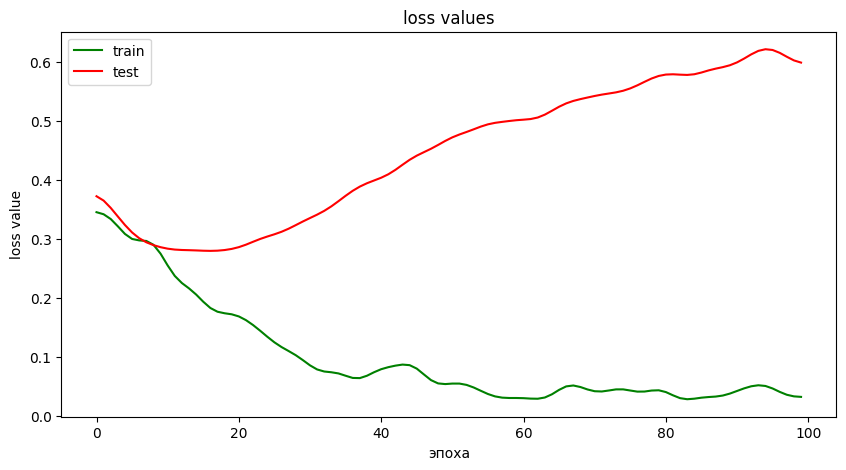

In [ ]:
# строим графики - функции потерь

from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'loss value')
train_loss_smoothed = gaussian_filter1d(train_loss_history, sigma=2)
ax.plot(train_loss_smoothed, color='green',  label='train')

test_loss_smoothed = gaussian_filter1d(test_loss_history, sigma=2)
ax.plot(test_loss_smoothed, color='red',  label='test')
ax.legend()
plt.show()



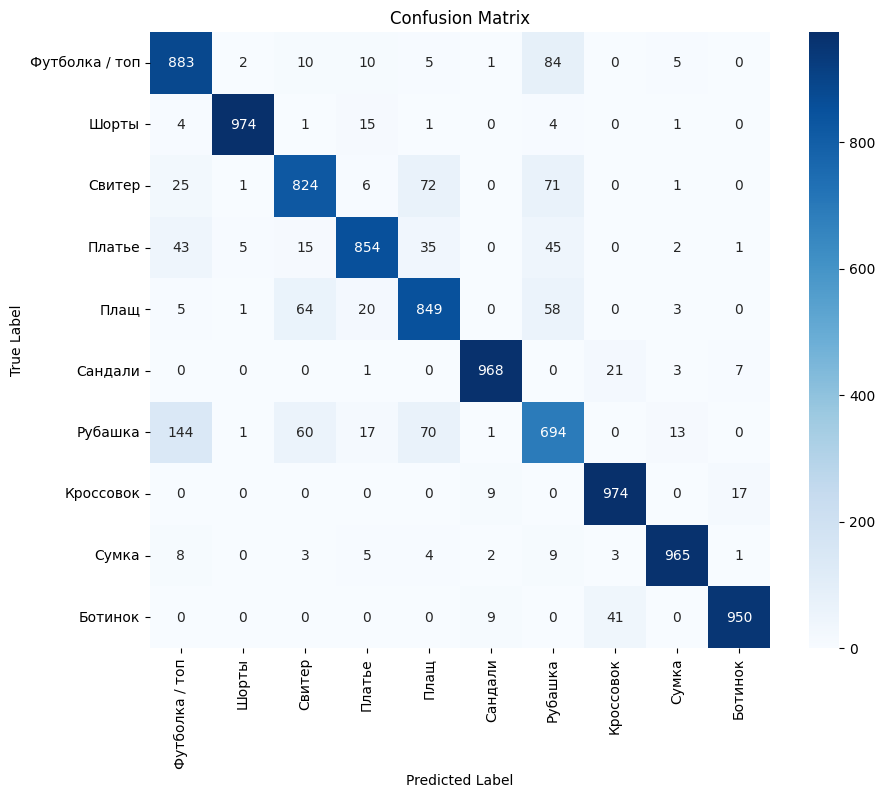

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Получаем предсказания
test_preds = lenet5.forward(X_test).argmax(dim=1).cpu().numpy()
y_true = y_test.cpu().numpy()

cm = confusion_matrix(y_true, test_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


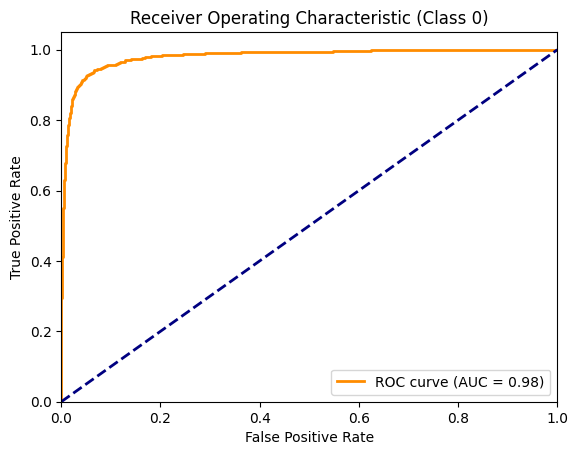

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Бинаризуем метки классов для многоуровневого ROC
y_test_bin = label_binarize(y_true, classes=np.arange(10))
test_preds_prob = lenet5.forward(X_test).detach().cpu().numpy()

# ROC и AUC для одного класса (например, для класса 0)
fpr, tpr, _ = roc_curve(y_test_bin[:, 0], test_preds_prob[:, 0])
roc_auc = auc(fpr, tpr)

# Визуализируем ROC-кривую
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Class 0)')
plt.legend(loc='lower right')
plt.show()


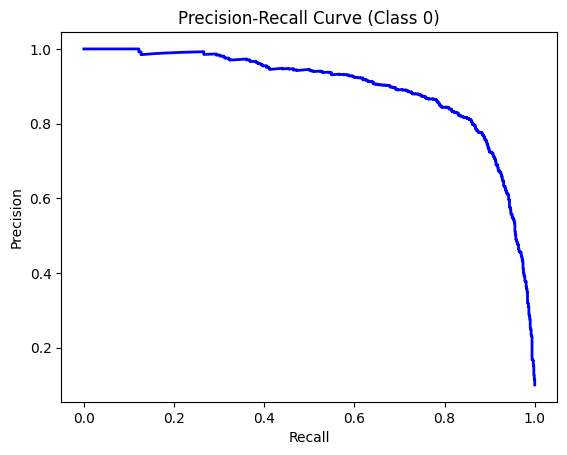

In [ ]:
from sklearn.metrics import precision_recall_curve

# Получаем Precision-Recall для одного класса (например, для класса 0)
precision, recall, _ = precision_recall_curve(y_test_bin[:, 0], test_preds_prob[:, 0])

# Визуализируем Precision-Recall-кривую
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Class 0)')
plt.show()


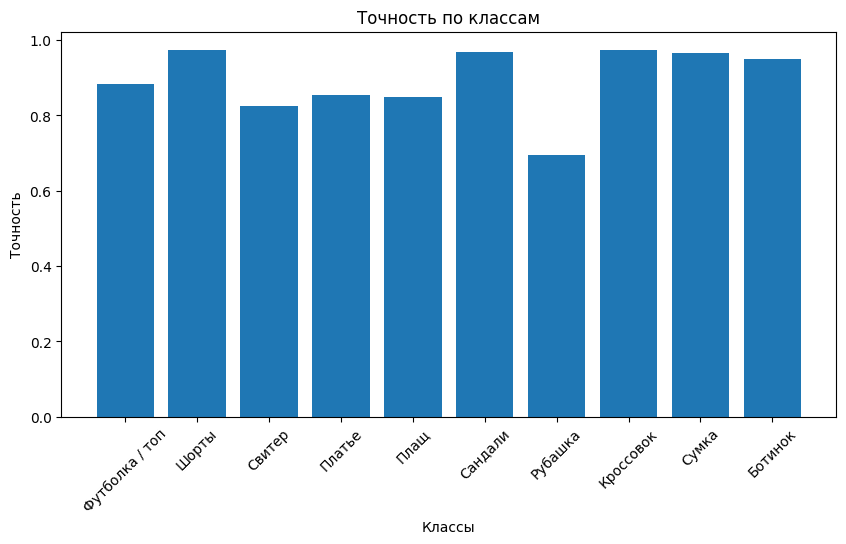

In [ ]:
class_accuracies = []

for i in range(10):
    class_mask = (y_true == i)
    class_accuracy = (test_preds[class_mask] == y_true[class_mask]).mean()
    class_accuracies.append(class_accuracy)

plt.figure(figsize=(10, 5))
plt.bar(class_names, class_accuracies)
plt.title('Точность по классам')
plt.xlabel('Классы')
plt.ylabel('Точность')
plt.xticks(rotation=45)
plt.show()


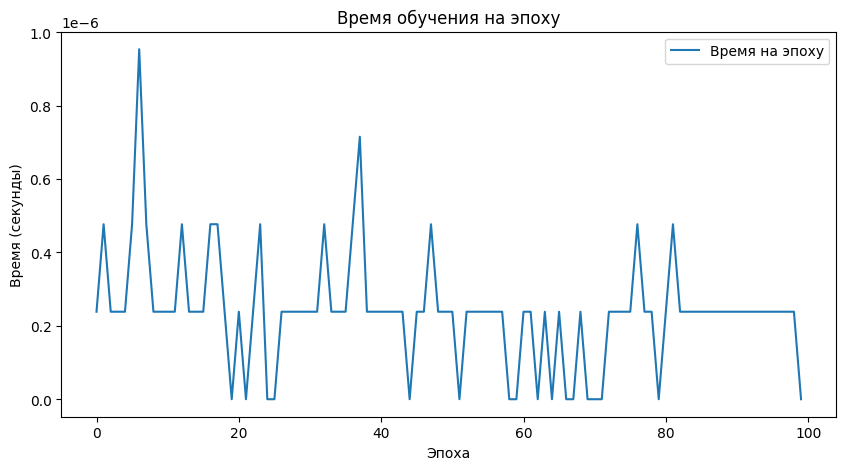

In [ ]:
import time

times_per_epoch = []
for epoch in range(100):
    start_time = time.time()

    # Тренировка модели...

    end_time = time.time()
    times_per_epoch.append(end_time - start_time)

# Построим график
plt.figure(figsize=(10, 5))
plt.plot(times_per_epoch, label='Время на эпоху')
plt.title('Время обучения на эпоху')
plt.xlabel('Эпоха')
plt.ylabel('Время (секунды)')
plt.legend()
plt.show()


<ipython-input-49-7ea75e20b699>:3: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


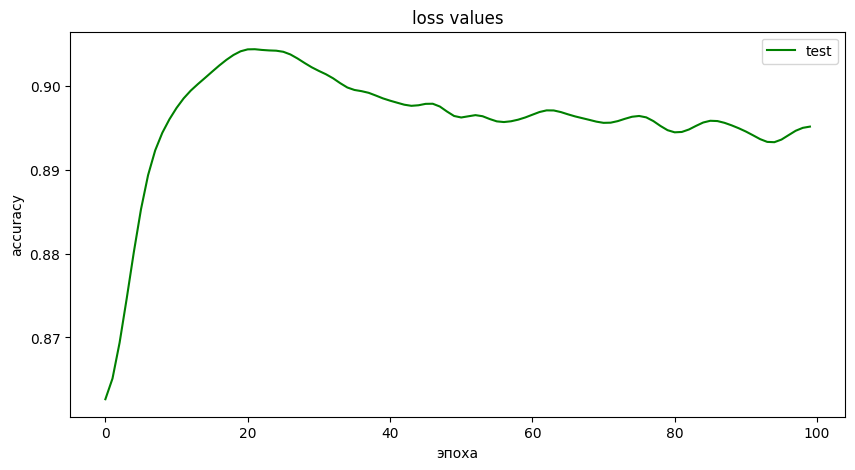

In [ ]:
# График изменения accuracy на тестовых данных

from scipy.ndimage.filters import gaussian_filter1d
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.set(title = 'loss values',
       xlabel = 'эпоха',
       ylabel = 'accuracy')
test_accuracy_smoothed = gaussian_filter1d(test_accuracy_history, sigma=2)
ax.plot(test_accuracy_smoothed, color='green',  label='test')

ax.legend()
plt.show()


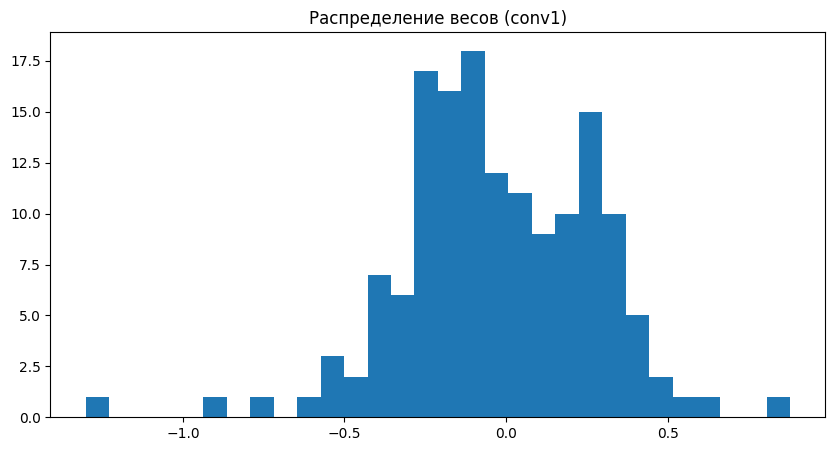

In [ ]:
# Построим гистограмму весов первого сверточного слоя
weights = lenet5.conv1.weight.data.cpu().numpy()

plt.figure(figsize=(10, 5))
plt.hist(weights.flatten(), bins=30)
plt.title('Распределение весов (conv1)')
plt.show()


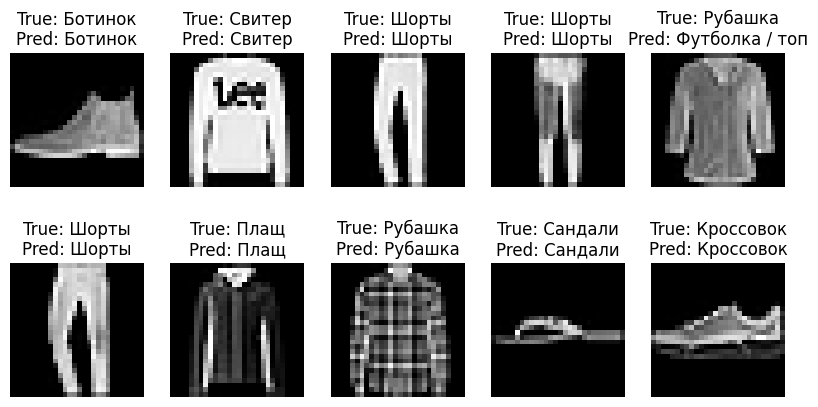

In [ ]:
def show_predictions(images, labels, predictions, class_names, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        true_label = class_names[labels[i]]
        predicted_label = class_names[predictions[i]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Пример вывода 10 изображений с предсказанными и истинными классами
test_preds = lenet5.forward(X_test).argmax(dim=1)
show_predictions(X_test, y_test, test_preds, class_names)


In [ ]:
accuracy = (test_preds == y_test).float().mean().data.cpu()
print(f"Эпоха {epoch} - Точность: {accuracy}")
for i in range(5):
    true_class = class_names[y_test[i].item()]
    predicted_class = class_names[test_preds[i].item()]
    print(f"Истинный класс: {true_class}, Предсказанный класс: {predicted_class}")


Эпоха 99 - Точность: 0.8934999704360962
Истинный класс: Ботинок, Предсказанный класс: Ботинок
Истинный класс: Свитер, Предсказанный класс: Свитер
Истинный класс: Шорты, Предсказанный класс: Шорты
Истинный класс: Шорты, Предсказанный класс: Шорты
Истинный класс: Рубашка, Предсказанный класс: Футболка / топ


# Сохранение и использование


In [ ]:
# Импортируем необходимые библиотеки
import torch
import dill
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# сохраняем произвольное число из датасета (тензор) в файл
timg = X_train[0]

torch.save(timg,'tensor.pt')


# смотрим размер тензора - изображения
timg.size()

# и размер того, что изначально скармливали нейронке.
# тензор подобного размера надо будет скормить нейронке для предсказания

X_test.size()

with open("model.dill", "wb") as dill_file:
    dill.dump(lenet5, dill_file)



with open("model.pickle", "wb") as pickle_file:
    pickle.dump(lenet5, pickle_file)


<ipython-input-78-d370979234cf>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_data = torch.load('tensor.pt')


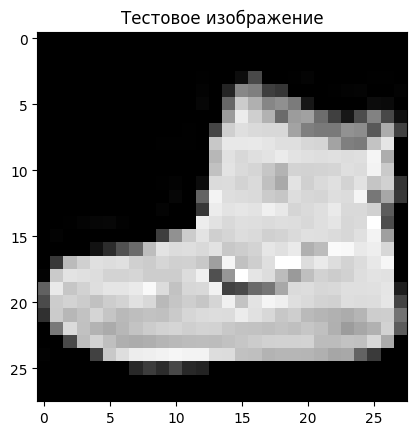

Модель предсказала: Ботинок (Класс 9)


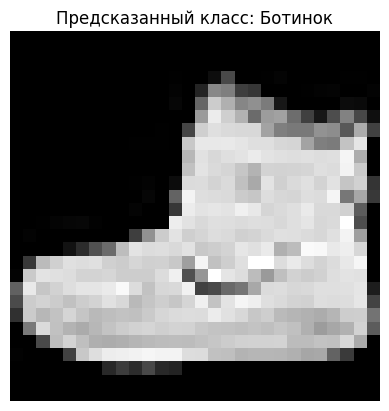

In [ ]:

# сохраняем произвольное число из датасета (тензор) в файл
timg = X_train[0]

torch.save(timg,'tensor.pt')

# Загружаем модель, сохраненную в dill
with open("model.dill", "rb") as dill_file:
    modelp = dill.load(dill_file)

# Загружаем сохраненное изображение
test_data = torch.load('tensor.pt')

# Смотрим, что пришло из файла изображения
plt.imshow(test_data[0, :, :], cmap='gray')
plt.title('Тестовое изображение')
plt.show()

# Переводим входной тензор-изображение в тензор нужного нам размера [1, 1, 28, 28]
t_data = torch.tensor([test_data.numpy()])

# Проверяем устройство, на котором будем выполнять расчет (GPU или CPU)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Отправляем модель и данные на нужное устройство
modelp = modelp.to(device)
t_data = t_data.to(device)

# Делаем предсказание
modelp.eval()  # Переводим модель в режим оценки
with torch.no_grad():  # Отключаем градиенты, т.к. они не нужны для инференса
    preds = modelp.forward(t_data)

# Получаем индекс класса с максимальной вероятностью
prediction = preds.argmax(dim=1).item()

# Отображаем результат
predicted_class_name = class_names[prediction]
print(f"Модель предсказала: {predicted_class_name} (Класс {prediction})")

# Визуализируем изображение с предсказанным классом
plt.imshow(test_data[0, :, :], cmap='gray')
plt.title(f'Предсказанный класс: {predicted_class_name}')
plt.axis('off')
plt.show()


Класс предсказан верно
